In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_merge = pd.merge(mouse,clinical,on="Mouse ID",how="outer")

# Display the data table for preview
trial_merge


Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        f234  Stelasyn          0           45.000000                 0
1        f234  Stelasyn          5           47.313491                 0
2        f234  Stelasyn         10           47.904324                 0
3        f234  Stelasyn         15           48.735197                 1
4        f234  Stelasyn         20           51.112713                 2
...       ...       ...        ...                 ...               ...
1901     j235   Placebo          0           45.000000                 0
1902     j235   Placebo          5           46.588820                 0
1903     j235   Placebo         10           48.018788                 1
1904     j235   Placebo         15           51.161138                 1
1905     j235   Placebo         20           52.942902                 1

[1906 rows x 5 columns]

## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = trial_merge.groupby(['Drug','Timepoint'])
tumorvol_mean = tumor['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorvol_df = pd.DataFrame({'Mean Tumor Volume':tumorvol_mean})
# Preview DataFrame
tumorvol_df

Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325
...                                ...
Zoniferol 25                 55.432935
          30                 57.713531
          35                 60.089372
          40                 62.916692
          45                 65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_err = tumor['Tumor Volume (mm3)'].sem()
tumorvol_err
# Convert to DataFrame
volerr_df = pd.DataFrame({'Tumor Vol Standard Error':tumorvol_err})
# Preview DataFrame
volerr_df


Tumor Vol Standard Error
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.448593
          10                         0.702684
          15                         0.838617
          20                         0.909731
...                                       ...
Zoniferol 25                         0.602513
          30                         0.800043
          35                         0.881426
          40                         0.998515
          45                         1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorvol_df = tumorvol_df.reset_index(drop=False)

tumor_pivot = pd.pivot_table(tumorvol_df,values='Mean Tumor Volume',index='Timepoint',columns='Drug')

volerr_df = volerr_df.reset_index(drop=False)

error_pivot = pd.pivot_table(volerr_df,values='Tumor Vol Standard Error',index='Timepoint',columns='Drug')
# Preview that Reformatting worked
error_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   
25          0.881642  0.439356   0.550315  0.755413  0.813706  1.034872   
30          0.934460  0.490620   0.631061  0.934121  0.975496  1.218231   
35          1.052241  0.692248   0.984155  1.127867  1.013769  1.287481   
40          1.223608  0.708505   1.055220  1.158449  1.118567  1.370634   
45          1.223977  0.902358   1.144427  1.453186  1.416363  1.351726   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.231708  0.482955  0.239862   0.188950  
10         0.376195  0.720225  0.433678   0.263949  
15         0.466109  0.770432  0.493261   0.370544  
20         0.555181  0.786199  0.621889   0.533182  
25         0.577401  0.746991  0.741922   0.602513  
30         0.746045  0.864906  0.899548   0.800043  
35         1.084929  0.967433  1.003186   0.881426  
40         1.564779  1.128445  1.410435   0.998515  
45         1.888586  1.226805  1.576556   1.003576

In [5]:
tumor_pivot = tumor_pivot.reset_index()
error_pivot = error_pivot.reset_index()

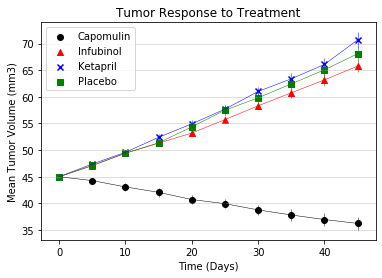

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Capomulin'],label='Capomulin',c='k')
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Infubinol'],label='Infubinol',c='r',marker="^")
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Ketapril'],label='Ketapril',c='b',marker="x")
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Placebo'],label='Placebo',c='g',marker="s")

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.grid(which="major", axis='y',alpha=0.5)

plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Capomulin'],yerr=error_pivot['Capomulin'],c='k',linewidth=0.5)
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Infubinol'],yerr=error_pivot['Infubinol'],c='r',linewidth=0.5)
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Ketapril'],yerr=error_pivot['Ketapril'],c='b',linewidth=0.5)
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Placebo'],yerr=error_pivot['Placebo'],c='g',linewidth=0.5)


# Save the Figure
plt.show()
plt.savefig("Figures/tumor_response.png")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite = tumor['Metastatic Sites'].mean()

# Convert to DataFrame
metsite_df = pd.DataFrame({"Average Met Sites":metsite})
# Preview DataFrame
metsite_df.head()

Average Met Sites
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.160000
          10                  0.320000
          15                  0.375000
          20                  0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_error = tumor['Metastatic Sites'].sem()
# Convert to DataFrame
meterr_df = pd.DataFrame({"Metastatic Sites Standard Error":metsite_error})
# Preview DataFrame
meterr_df

Metastatic Sites Standard Error
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.074833
          10                                0.125433
          15                                0.132048
          20                                0.161621
...                                              ...
Zoniferol 25                                0.236621
          30                                0.248168
          35                                0.285714
          40                                0.299791
          45                                0.286400

[100 rows x 1 columns]

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metsite_df = metsite_df.reset_index(drop=False)

metsite_pivot = pd.pivot_table(metsite_df,values='Average Met Sites',index='Timepoint',columns='Drug')

meterr_df = meterr_df.reset_index(drop=False)

meterr_pivot = pd.pivot_table(meterr_df,values='Metastatic Sites Standard Error',index='Timepoint',columns='Drug')
# Preview that Reformatting worked
meterr_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.074833  0.108588   0.091652  0.098100  0.093618  0.100947   
10          0.125433  0.152177   0.159364  0.142018  0.163577  0.115261   
15          0.132048  0.180625   0.194015  0.191381  0.158651  0.190221   
20          0.161621  0.241034   0.234801  0.236680  0.181731  0.234064   
25          0.181818  0.258831   0.265753  0.288275  0.185240  0.263888   
30          0.172944  0.249479   0.227823  0.347467  0.266667  0.300264   
35          0.169496  0.266526   0.224733  0.361418  0.330464  0.341412   
40          0.175610  0.289128   0.314466  0.315725  0.321702  0.297294   
45          0.202591  0.286101   0.309320  0.278722  0.351104  0.304240   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.095219  0.066332  0.087178   0.077709  
10         0.105690  0.090289  0.123672   0.109109  
15         0.136377  0.115261  0.153439   0.111677  
20         0.171499  0.119430  0.200905   0.166378  
25         0.199095  0.119430  0.219824   0.236621  
30         0.266469  0.139968  0.230641   0.248168  
35         0.366667  0.145997  0.240983   0.285714  
40         0.433903  0.160591  0.312815   0.299791  
45         0.428571  0.190221  0.359062   0.286400

In [10]:
metsite_pivot = metsite_pivot.reset_index()
meterr_pivot = meterr_pivot.reset_index()

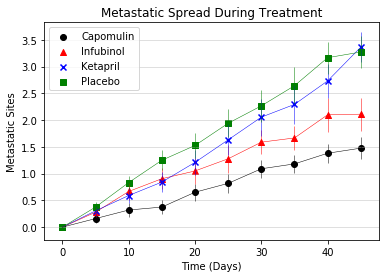

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
plt.scatter(metsite_pivot['Timepoint'],metsite_pivot['Capomulin'],label='Capomulin',c='k')
plt.scatter(metsite_pivot['Timepoint'],metsite_pivot['Infubinol'],label='Infubinol',c='r',marker="^")
plt.scatter(metsite_pivot['Timepoint'],metsite_pivot['Ketapril'],label='Ketapril',c='b',marker="x")
plt.scatter(metsite_pivot['Timepoint'],metsite_pivot['Placebo'],label='Placebo',c='g',marker="s")

plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.grid(which="major", axis='y',alpha=0.5)

plt.errorbar(metsite_pivot['Timepoint'],metsite_pivot['Capomulin'],yerr=meterr_pivot['Capomulin'],c='k',linewidth=0.5)
plt.errorbar(metsite_pivot['Timepoint'],metsite_pivot['Infubinol'],yerr=meterr_pivot['Infubinol'],c='r',linewidth=0.5)
plt.errorbar(metsite_pivot['Timepoint'],metsite_pivot['Ketapril'],yerr=meterr_pivot['Ketapril'],c='b',linewidth=0.5)
plt.errorbar(metsite_pivot['Timepoint'],metsite_pivot['Placebo'],yerr=meterr_pivot['Placebo'],c='g',linewidth=0.5)


# Save the Figure
plt.show()
plt.savefig("Figures/metsite_response.png")

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = tumor['Mouse ID'].count()

# Convert to DataFrame
mice_df = pd.DataFrame({"Mouse Count":mice})
# Preview DataFrame
mice_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_df = mice_df.reset_index(drop=False)
start_count = mice_df.loc[mice_df['Timepoint']==0]
mice_pivot = pd.pivot_table(mice_df,values='Mouse Count',index='Timepoint',columns='Drug')

# Preview that Reformatting worked
mice_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17  
25               14        23        19         16  
30               13        23        18         15  
35               10        21        16         14  
40                9        20        12         14  
45                7        20        11         14

In [14]:
capo_percent = mice_pivot['Capomulin']/25*100
infu_percent = mice_pivot['Infubinol']/25*100
keta_percent = mice_pivot['Ketapril']/25*100
placebo_percent = mice_pivot['Placebo']/25*100

mice_pivot['% Capomulin Survival']=capo_percent
mice_pivot['% Infubinol Survival']=infu_percent
mice_pivot['% Ketapril Survival']=keta_percent
mice_pivot['% Placebo Survival']=placebo_percent
mice_pivot

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  % Capomulin Survival  \
Timepoint                                                                  
0                26        25        26         25                 100.0   
5                25        25        25         24                 100.0   
10               23        24        23         22                 100.0   
15               17        24        23         21                  96.0   
20               17        23        21         17                  92.0   
25               14        23        19         16                  88.0   
30               13        23        18         15                  88.0   
35               10        21        16         14                  88.0   
40                9        20        12         14                  84.0   
45                7        20        11         14                  84.0   

Drug       % Infubinol Survival  % Ketapril Survival  % Placebo Survival  
Timepoint                                                                 
0                         100.0                100.0               100.0  
5                         100.0                 92.0                96.0  
10                         84.0                 88.0                96.0  
15                         84.0                 76.0                80.0  
20                         80.0                 76.0                76.0  
25                         72.0                 76.0                68.0  
30                         68.0                 72.0                60.0  
35                         48.0                 68.0                56.0  
40                         40.0                 60.0                48.0  
45                         36.0                 44.0                44.0

In [15]:
mice_pivot = mice_pivot.reset_index()

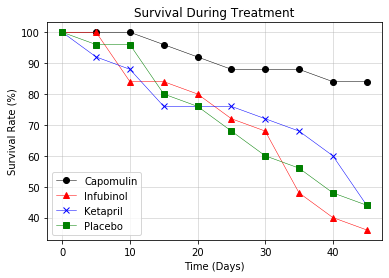

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(mice_pivot['Timepoint'],mice_pivot['% Capomulin Survival'],label='Capomulin',c='k',marker="o",linewidth='0.5')
plt.plot(mice_pivot['Timepoint'],mice_pivot['% Infubinol Survival'],label='Infubinol',c='r',marker="^",linewidth='0.5')
plt.plot(mice_pivot['Timepoint'],mice_pivot['% Ketapril Survival'],label='Ketapril',c='b',marker="x",linewidth='0.5')
plt.plot(mice_pivot['Timepoint'],mice_pivot['% Placebo Survival'],label='Placebo',c='g',marker="s",linewidth='0.5')

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid(which="major",alpha=0.5)
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
volume = tumorvol_df.reset_index(drop=True)
start_vol = volume.loc[volume['Timepoint']==0,:].rename(columns={'Mean Tumor Volume':'Initial Volume'})
end_vol = volume.loc[volume['Timepoint']==45,:].rename(columns={'Mean Tumor Volume':'Final Volume'})
del start_vol['Timepoint']
del end_vol['Timepoint']
vol_merge = pd.merge(start_vol,end_vol,on='Drug')
vol_merge['Change (%)']=((vol_merge['Final Volume']-vol_merge['Initial Volume'])/vol_merge['Initial Volume']*100)
vol_merge['Change (%)']=round(vol_merge['Change (%)'],2)

# Display the data to confirm
vol_merge


Drug  Initial Volume  Final Volume  Change (%)
0  Capomulin            45.0     36.236114      -19.48
1   Ceftamin            45.0     64.132421       42.52
2  Infubinol            45.0     65.755562       46.12
3   Ketapril            45.0     70.662958       57.03
4   Naftisol            45.0     69.265506       53.92
5    Placebo            45.0     68.084082       51.30
6   Propriva            45.0     66.258529       47.24
7   Ramicane            45.0     34.955595      -22.32
8   Stelasyn            45.0     68.438310       52.09
9  Zoniferol            45.0     65.960888       46.58

In [26]:
x_axis = 4
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']


KeyError: 'Capomulin'

In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined